In [1]:
## Archivo de Entrenamiento
! gdown 1zTyEasB9XmrobEhb-JzUvIZxlfFDMx2-

Downloading...
From: https://drive.google.com/uc?id=1zTyEasB9XmrobEhb-JzUvIZxlfFDMx2-
To: /content/dfTrainV_20220814_V4.csv
100% 394M/394M [00:03<00:00, 124MB/s]


In [2]:
## Archivo de Submit
! gdown  1xliRTFX_5kmvbvqtQ52xwnFKgRWSw-p8

Downloading...
From: https://drive.google.com/uc?id=1xliRTFX_5kmvbvqtQ52xwnFKgRWSw-p8
To: /content/dfSubmitV_20220814_V4.csv
100% 134M/134M [00:01<00:00, 127MB/s]


In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 125 kB/s 


In [4]:
# Pandas
import pandas as pd

# CatBoost
from catboost import CatBoostClassifier, Pool

# SKLearn
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, recall_score

# MatplotLib
from matplotlib import pyplot as plt

# Seaborn
import seaborn as sns

# Numpy
import numpy as np

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
dfTrain  = pd.read_csv('/content/dfTrainV_20220814_V4.csv' )
dfSubmit = pd.read_csv('/content/dfSubmitV_20220814_V4.csv' )

In [7]:
dfTrain.head()

,nro_telefono_hash,TIPO_ADQ,SCORECAT,MARCA,NUEVA_GAMMA,OS,DEVICE_TYPE,CAT_VARIACION_MINFLU1,CAT_VARIACION_MINFLU2,CAT_VARIACION_APP1,CAT_VARIACION_APP2,CAT_VARIACION_APP3,CAT_VARIACION_APP4,CAT_VARIACION_APP5,CAT_VARIACION_APP6,CAT_VARIACION_APP7,CAT_VARIACION_APP8,CAT_VARIACION_APP9,CAT_VARIACION_RESTO,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3,FLG_GRUPO1,FLG_GRUPO2,FLG_GRUPO4,FLG_GRUPO6,FLG_GRUPO7,FLG_GRUPO9,FLG_GRUPO10,FLG_GRUPO11,FLG_GRUPO16,FLG_TARGETPREV,TIPOEQUIPO,VCHMESADENDA,VCHPENALIDAD,DAYS_FECINGRESO,DAYS_FECACTCONT,DAYS_LANZAMIENT,mins_flujo_1,mins_flujo_2,flg_flujo,trafico_app_1,trafico_app_2,trafico_app_3,trafico_app_4,trafico_app_5,trafico_app_6,trafico_app_7,trafico_app_8,trafico_app_9,trafico_resto,apptoppreferida,flgusopreferente,TARGET
0,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,tipo1,alto,e2f4e2c4b8d7cf9c17f5b7b3ec83bc02068bd673a2a87c...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,3e33e191fc2f1513037662f262867a04e278e8a0589a32...,8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6...,1,0,0,1,0,0,0,0,1,1,1,1,NO_INFORMACION,PROPIO,0.0,0.00,3988,1151,250,162.666667,334.983333,conflg_02,0.362702,1491.756171,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,15114.021472,trafico_app_2,usoresto,0
1,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,tipo1,alto,d4c6a5785b57062229039a79c714d3cb3a4dac4e3e63ef...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0,0,0,1,0,0,0,0,1,NO_INFORMACION,FINANCIADO,7.6,365.57,5997,1145,1601,652.466667,1465.866667,conflg_02,116.006533,411.665270,0.0,0.0,0.0,0.0,0.029129,180.536775,0.0,2996.985180,trafico_app_2,usoresto,0
2,73cec44593f362cccdb45773197a0bf2136978cb241c91...,tipo1,medio,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,1,0,0,1,0,0,0,0,1,NO_INFORMACION,PROPIO,0.0,0.00,5997,1145,740,481.983333,299.100000,conflg_04,74.277843,1311.141026,0.0,0.0,0.0,0.0,12.869561,980.521564,0.0,2238.233796,trafico_app_2,usopreferido,0
3,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,tipo2,NOINFORMACION,NOINFORMACION,NOINFORMACION,NOINFORMACION,NOINFORMACION,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0,0,0,0,0,0,0,0,0,NO_INFORMACION,PROPIO,0.0,0.00,5997,1145,916,0.016667,0.000000,conflg_06,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,ninguna,usoresto,0
4,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,tipo1,alto,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,noinfo,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0,0,0,0,0,0,0,0,1,NO_INFORMACION,PROPIO,0.0,0.00,5997,1145,916,205.416667,291.983333,conflg_03,25.465849,288.978822,0.0,0.0,0.0,0.0,1.113294,37.027894,0.0,97.467674,trafico_app_2,usopreferido,0


In [8]:
cat_features = ["TIPO_ADQ","SCORECAT",
## "MODELO",
"MARCA", "NUEVA_GAMMA","OS","DEVICE_TYPE",
"GIRO","SUBGIRO",
"TIENE_PROD_1","TIENE_PROD_2",
"CAT_VARIACION_MINFLU1" , "CAT_VARIACION_MINFLU2" , 
"CAT_VARIACION_APP1"    , "CAT_VARIACION_APP2"    , "CAT_VARIACION_APP3" , 
"CAT_VARIACION_APP4"    , "CAT_VARIACION_APP5"    , "CAT_VARIACION_APP6" ,
"CAT_VARIACION_APP7"    , "CAT_VARIACION_APP8"    , "CAT_VARIACION_APP9" ,
"CAT_VARIACION_RESTO"   ,

## "TIENE_PROD_3",
"FLG_GRUPO1", "FLG_GRUPO2","FLG_GRUPO4","FLG_GRUPO6","FLG_GRUPO7" ,
## "FLG_GRUPO3", "FLG_GRUPO5", "FLG_GRUPO8" ,
"FLG_GRUPO9","FLG_GRUPO10","FLG_GRUPO11","FLG_GRUPO16", "FLG_TARGETPREV","TIPOEQUIPO" , "apptoppreferida" , "flgusopreferente" , "flg_flujo"]

In [9]:
data   = dfTrain.drop(['nro_telefono_hash','TARGET'  , 'TIENE_PROD_3' ], axis=1)
data[cat_features] = data[cat_features].astype(str)
target = dfTrain['TARGET']

In [10]:
X_test = dfSubmit.drop(['nro_telefono_hash','TARGET'  , 'TIENE_PROD_3' ], axis=1)
X_test[cat_features] = X_test[cat_features].astype(str)
test_data = Pool(data=X_test,cat_features=cat_features)

In [11]:
print("Cantidad de Renovados    : {}".format(sum(target==1)))
print("Cantidad de No Renovados : {} \n".format(sum(target==0)))

Cantidad de Renovados    : 16419
Cantidad de No Renovados : 529873 



In [12]:
529873  / 16419

32.27194104391254

In [13]:
# N_FOLDS               = 10
SEED                  = 2022
EARLY_STOPPING_ROUNDS = 100
VERBOSE               = 100

In [14]:
### Depth 

In [15]:
# params = {'loss_function': 'Logloss',     # objective function
#           'eval_metric'  : 'AUC',           # metric
#           'cat_features' : cat_features,  # categorical columns
#         #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
#         #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
#           'scale_pos_weight'     : 32     ,  ## 32
#           'random_seed'          : 1      ,
#           'learning_rate'        : 0.01   ,
#           'iterations'           : 1000   ,
#           'depth'                : 5      ,
#           'l2_leaf_reg'          : 10     , 
#           'task_type'            : 'GPU'  
#          }


# N_FOLDS = 10

# oof  = np.zeros(dfTrain.shape[0])
# oof2 = np.zeros(dfTrain.shape[0])
# pred = 0
# skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


# for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
#     print(f'========FOLD{fold}========')
    
#     train_x = data.iloc[trn_idx]
#     train_y = target.iloc[trn_idx]
#     val_x   = data.iloc[val_idx]
#     val_y   = target.iloc[val_idx]
    
#     model   = CatBoostClassifier(**params)
#     model.fit( train_x , train_y,
#                eval_set = [(val_x,val_y)],              
#                use_best_model = True ,
#                early_stopping_rounds = EARLY_STOPPING_ROUNDS,
#                verbose = VERBOSE
#              )
#     oof[val_idx]  = model.predict_proba(val_x)[: , 1]
#     oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
#     pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
#     score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
#     score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
#     print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
# score = roc_auc_score(target , oof , average = 'micro')
# print(f'AUC {score}\n')         

In [16]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.02   ,
          'iterations'           : 1500   ,
          'depth'                : 5      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7544736	best: 0.7544736 (0)	total: 117ms	remaining: 2m 55s
100:	test: 0.7763775	best: 0.7763775 (100)	total: 9.28s	remaining: 2m 8s
200:	test: 0.7813691	best: 0.7813691 (200)	total: 18.4s	remaining: 1m 58s
300:	test: 0.7830561	best: 0.7830650 (295)	total: 27.5s	remaining: 1m 49s
400:	test: 0.7836687	best: 0.7837054 (395)	total: 36.5s	remaining: 1m 40s
500:	test: 0.7841204	best: 0.7841322 (495)	total: 45.7s	remaining: 1m 31s
600:	test: 0.7846447	best: 0.7846717 (590)	total: 55.8s	remaining: 1m 23s
700:	test: 0.7852227	best: 0.7852331 (696)	total: 1m 5s	remaining: 1m 14s
800:	test: 0.7854319	best: 0.7854565 (798)	total: 1m 14s	remaining: 1m 4s
900:	test: 0.7855613	best: 0.7855684 (899)	total: 1m 23s	remaining: 55.5s
1000:	test: 0.7857690	best: 0.7857690 (1000)	total: 1m 33s	remaining: 46.4s
1100:	test: 0.7859577	best: 0.7860134 (1088)	total: 1m 42s	remaining: 37.2s
1200:	test: 0.7861422	best: 0.7861956 (1179)	total: 1m 51s	remaining: 27.9s
1300:	test: 0.7863067	best: 0.7864006

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7543350	best: 0.7543350 (0)	total: 118ms	remaining: 2m 56s
100:	test: 0.7701053	best: 0.7701053 (100)	total: 9.39s	remaining: 2m 10s
200:	test: 0.7758684	best: 0.7758684 (200)	total: 18.7s	remaining: 2m
300:	test: 0.7775426	best: 0.7775426 (300)	total: 28.4s	remaining: 1m 53s
400:	test: 0.7789610	best: 0.7790156 (396)	total: 37.7s	remaining: 1m 43s
500:	test: 0.7797493	best: 0.7797541 (499)	total: 47.1s	remaining: 1m 33s
600:	test: 0.7803202	best: 0.7803636 (574)	total: 56.3s	remaining: 1m 24s
700:	test: 0.7811208	best: 0.7811363 (699)	total: 1m 6s	remaining: 1m 15s
800:	test: 0.7814574	best: 0.7815287 (771)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7819191	best: 0.7819299 (896)	total: 1m 25s	remaining: 56.8s
1000:	test: 0.7823154	best: 0.7823371 (997)	total: 1m 34s	remaining: 47.2s
1100:	test: 0.7827428	best: 0.7827538 (1097)	total: 1m 43s	remaining: 37.6s
1200:	test: 0.7832000	best: 0.7832289 (1186)	total: 1m 53s	remaining: 28.2s
1300:	test: 0.7833947	best: 0.7834050 (12

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7515498	best: 0.7515498 (0)	total: 117ms	remaining: 2m 55s
100:	test: 0.7790520	best: 0.7790520 (100)	total: 10.1s	remaining: 2m 20s
200:	test: 0.7850747	best: 0.7850747 (200)	total: 19.5s	remaining: 2m 5s
300:	test: 0.7876256	best: 0.7876256 (300)	total: 28.8s	remaining: 1m 54s
400:	test: 0.7887609	best: 0.7887609 (400)	total: 38.2s	remaining: 1m 44s
500:	test: 0.7897101	best: 0.7897101 (500)	total: 47.6s	remaining: 1m 34s
600:	test: 0.7904151	best: 0.7904151 (600)	total: 56.9s	remaining: 1m 25s
700:	test: 0.7908743	best: 0.7908823 (697)	total: 1m 6s	remaining: 1m 15s
800:	test: 0.7913419	best: 0.7913419 (800)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7916537	best: 0.7916853 (898)	total: 1m 24s	remaining: 56.3s
1000:	test: 0.7917724	best: 0.7918370 (920)	total: 1m 33s	remaining: 46.8s
1100:	test: 0.7920703	best: 0.7920703 (1100)	total: 1m 44s	remaining: 37.8s
1200:	test: 0.7921102	best: 0.7921968 (1163)	total: 1m 53s	remaining: 28.3s
1300:	test: 0.7922148	best: 0.7922695 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7443969	best: 0.7443969 (0)	total: 118ms	remaining: 2m 56s
100:	test: 0.7661868	best: 0.7661868 (100)	total: 9.4s	remaining: 2m 10s
200:	test: 0.7716896	best: 0.7716896 (200)	total: 18.8s	remaining: 2m 1s
300:	test: 0.7746285	best: 0.7746285 (300)	total: 28.2s	remaining: 1m 52s
400:	test: 0.7763039	best: 0.7763364 (396)	total: 37.5s	remaining: 1m 42s
500:	test: 0.7775313	best: 0.7775488 (499)	total: 46.6s	remaining: 1m 32s
600:	test: 0.7784871	best: 0.7784871 (600)	total: 56.6s	remaining: 1m 24s
700:	test: 0.7792141	best: 0.7792508 (698)	total: 1m 5s	remaining: 1m 15s
800:	test: 0.7795356	best: 0.7795356 (800)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7802393	best: 0.7802393 (900)	total: 1m 24s	remaining: 56s
1000:	test: 0.7806748	best: 0.7807079 (992)	total: 1m 33s	remaining: 46.6s
1100:	test: 0.7810973	best: 0.7811015 (1099)	total: 1m 42s	remaining: 37.3s
1200:	test: 0.7815733	best: 0.7815733 (1200)	total: 1m 52s	remaining: 27.9s
1300:	test: 0.7818165	best: 0.7818359 (12

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7447235	best: 0.7447235 (0)	total: 120ms	remaining: 2m 59s
100:	test: 0.7653225	best: 0.7653225 (100)	total: 9.33s	remaining: 2m 9s
200:	test: 0.7717609	best: 0.7717609 (200)	total: 18.7s	remaining: 2m
300:	test: 0.7748275	best: 0.7748275 (300)	total: 28s	remaining: 1m 51s
400:	test: 0.7771001	best: 0.7771001 (400)	total: 37.3s	remaining: 1m 42s
500:	test: 0.7783255	best: 0.7783340 (499)	total: 46.6s	remaining: 1m 32s
600:	test: 0.7793289	best: 0.7793289 (600)	total: 55.8s	remaining: 1m 23s
700:	test: 0.7802692	best: 0.7802692 (700)	total: 1m 4s	remaining: 1m 14s
800:	test: 0.7811520	best: 0.7811520 (800)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7817686	best: 0.7818095 (888)	total: 1m 24s	remaining: 56s
1000:	test: 0.7824348	best: 0.7824379 (997)	total: 1m 33s	remaining: 46.6s
1100:	test: 0.7828132	best: 0.7828407 (1099)	total: 1m 42s	remaining: 37.3s
1200:	test: 0.7831622	best: 0.7831622 (1200)	total: 1m 52s	remaining: 27.9s
1300:	test: 0.7834855	best: 0.7835562 (1286)	t

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7441329	best: 0.7441329 (0)	total: 188ms	remaining: 4m 42s
100:	test: 0.7701256	best: 0.7701256 (100)	total: 9.47s	remaining: 2m 11s
200:	test: 0.7763322	best: 0.7763322 (200)	total: 18.9s	remaining: 2m 1s
300:	test: 0.7789234	best: 0.7789234 (300)	total: 28.1s	remaining: 1m 51s
400:	test: 0.7805058	best: 0.7805505 (399)	total: 37.5s	remaining: 1m 42s
500:	test: 0.7814674	best: 0.7814674 (500)	total: 46.7s	remaining: 1m 33s
600:	test: 0.7822094	best: 0.7822094 (600)	total: 55.8s	remaining: 1m 23s
700:	test: 0.7830488	best: 0.7830590 (695)	total: 1m 5s	remaining: 1m 14s
800:	test: 0.7836519	best: 0.7836770 (798)	total: 1m 14s	remaining: 1m 4s
900:	test: 0.7842526	best: 0.7842526 (900)	total: 1m 23s	remaining: 55.5s
1000:	test: 0.7845909	best: 0.7846244 (998)	total: 1m 32s	remaining: 46.3s
1100:	test: 0.7849194	best: 0.7849423 (1098)	total: 1m 43s	remaining: 37.3s
1200:	test: 0.7852978	best: 0.7853116 (1196)	total: 1m 52s	remaining: 27.9s
1300:	test: 0.7856405	best: 0.7856460 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7533540	best: 0.7533540 (0)	total: 118ms	remaining: 2m 56s
100:	test: 0.7761020	best: 0.7761020 (100)	total: 9.33s	remaining: 2m 9s
200:	test: 0.7817926	best: 0.7817926 (200)	total: 18.7s	remaining: 2m
300:	test: 0.7847454	best: 0.7847454 (300)	total: 28.6s	remaining: 1m 54s
400:	test: 0.7865379	best: 0.7865379 (400)	total: 38s	remaining: 1m 44s
500:	test: 0.7879759	best: 0.7879975 (498)	total: 47.2s	remaining: 1m 34s
600:	test: 0.7890364	best: 0.7890364 (600)	total: 56.4s	remaining: 1m 24s
700:	test: 0.7900428	best: 0.7900428 (700)	total: 1m 5s	remaining: 1m 14s
800:	test: 0.7912230	best: 0.7912230 (800)	total: 1m 15s	remaining: 1m 6s
900:	test: 0.7921543	best: 0.7921543 (900)	total: 1m 28s	remaining: 58.8s
1000:	test: 0.7927553	best: 0.7927818 (994)	total: 1m 37s	remaining: 48.7s
1100:	test: 0.7936445	best: 0.7936445 (1100)	total: 1m 47s	remaining: 38.8s
1200:	test: 0.7944224	best: 0.7944595 (1199)	total: 1m 56s	remaining: 28.9s
1300:	test: 0.7949419	best: 0.7949599 (1285)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7483124	best: 0.7483124 (0)	total: 117ms	remaining: 2m 55s
100:	test: 0.7762811	best: 0.7762811 (100)	total: 9.35s	remaining: 2m 9s
200:	test: 0.7841078	best: 0.7841078 (200)	total: 18.7s	remaining: 2m 1s
300:	test: 0.7868683	best: 0.7868853 (298)	total: 28.1s	remaining: 1m 52s
400:	test: 0.7887244	best: 0.7887325 (399)	total: 37.4s	remaining: 1m 42s
500:	test: 0.7899178	best: 0.7899278 (499)	total: 46.8s	remaining: 1m 33s
600:	test: 0.7910504	best: 0.7910717 (599)	total: 56.8s	remaining: 1m 24s
700:	test: 0.7916667	best: 0.7916667 (700)	total: 1m 5s	remaining: 1m 15s
800:	test: 0.7919438	best: 0.7919580 (798)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7922697	best: 0.7922697 (900)	total: 1m 24s	remaining: 56.2s
1000:	test: 0.7924723	best: 0.7924723 (1000)	total: 1m 33s	remaining: 46.7s
1100:	test: 0.7928678	best: 0.7928997 (1088)	total: 1m 43s	remaining: 37.4s
1200:	test: 0.7931157	best: 0.7931561 (1196)	total: 1m 52s	remaining: 28s
1300:	test: 0.7932955	best: 0.7933774 (1

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7383283	best: 0.7383283 (0)	total: 117ms	remaining: 2m 55s
100:	test: 0.7648939	best: 0.7648939 (100)	total: 9.37s	remaining: 2m 9s
200:	test: 0.7716039	best: 0.7716039 (200)	total: 18.7s	remaining: 2m
300:	test: 0.7745164	best: 0.7745164 (300)	total: 28s	remaining: 1m 51s
400:	test: 0.7762520	best: 0.7762683 (399)	total: 37.2s	remaining: 1m 41s
500:	test: 0.7771621	best: 0.7771897 (498)	total: 46.5s	remaining: 1m 32s
600:	test: 0.7781591	best: 0.7781591 (600)	total: 55.9s	remaining: 1m 23s
700:	test: 0.7789088	best: 0.7789240 (698)	total: 1m 5s	remaining: 1m 14s
800:	test: 0.7794126	best: 0.7794126 (800)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7801969	best: 0.7802061 (899)	total: 1m 24s	remaining: 56s
1000:	test: 0.7805449	best: 0.7805660 (998)	total: 1m 33s	remaining: 46.6s
1100:	test: 0.7808752	best: 0.7810138 (1080)	total: 1m 42s	remaining: 37.2s
1200:	test: 0.7812946	best: 0.7814009 (1187)	total: 1m 51s	remaining: 27.9s
1300:	test: 0.7816624	best: 0.7816624 (1300)	t

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7359968	best: 0.7359968 (0)	total: 117ms	remaining: 2m 55s
100:	test: 0.7582852	best: 0.7582852 (100)	total: 9.43s	remaining: 2m 10s
200:	test: 0.7664645	best: 0.7664645 (200)	total: 19.4s	remaining: 2m 5s
300:	test: 0.7697791	best: 0.7697791 (300)	total: 28.8s	remaining: 1m 54s
400:	test: 0.7724479	best: 0.7724479 (400)	total: 38.1s	remaining: 1m 44s
500:	test: 0.7742446	best: 0.7742446 (500)	total: 47.4s	remaining: 1m 34s
600:	test: 0.7753986	best: 0.7753986 (600)	total: 56.6s	remaining: 1m 24s
700:	test: 0.7761440	best: 0.7761440 (700)	total: 1m 5s	remaining: 1m 15s
800:	test: 0.7765630	best: 0.7766252 (769)	total: 1m 15s	remaining: 1m 5s
900:	test: 0.7772974	best: 0.7773034 (897)	total: 1m 24s	remaining: 56.1s
1000:	test: 0.7779219	best: 0.7779219 (1000)	total: 1m 33s	remaining: 46.6s
1100:	test: 0.7783995	best: 0.7784325 (1096)	total: 1m 42s	remaining: 37.2s
1200:	test: 0.7786202	best: 0.7787055 (1184)	total: 1m 52s	remaining: 28s
1300:	test: 0.7787159	best: 0.7788244 (

In [18]:
exportar_final = pd.DataFrame(
    {'nro_telefono_hash' : dfSubmit["nro_telefono_hash"],
     'TARGET'            : pred
    })

exportar_final.to_csv('Submit20220815_V8.csv', index=False)

Text(0.5, 1.0, 'CatBoost features importance:')

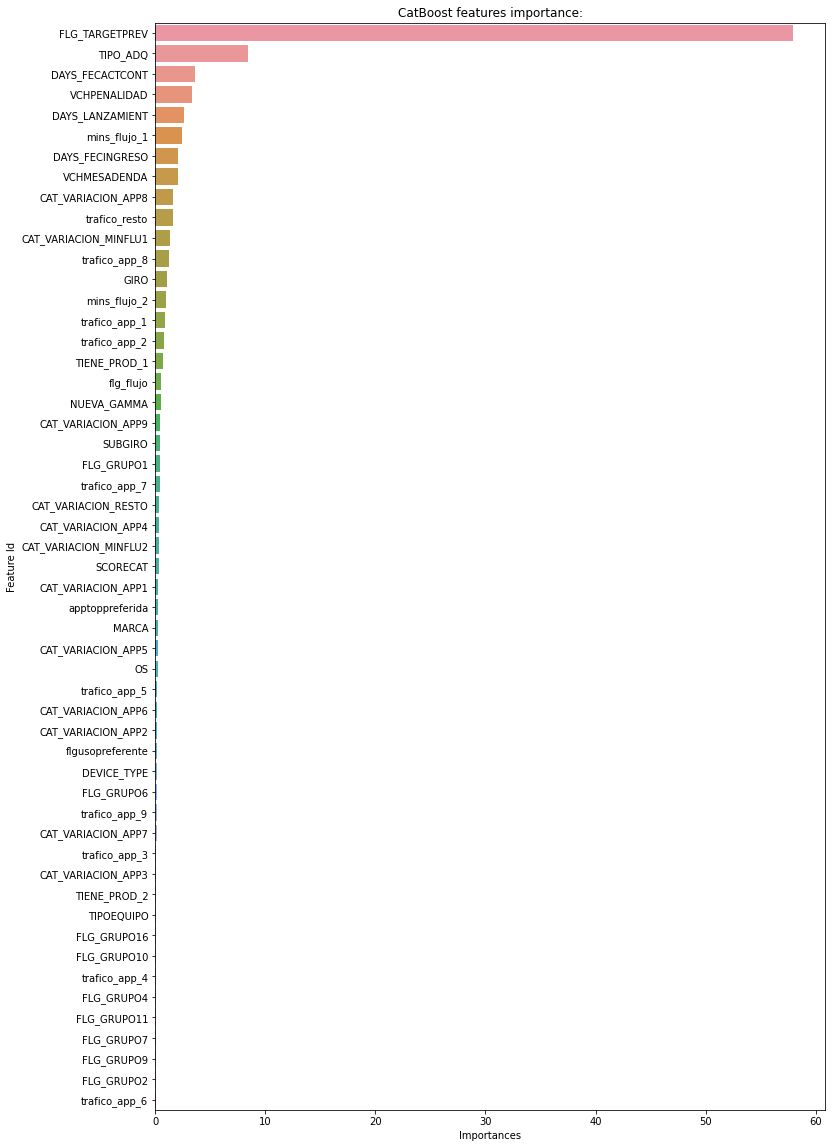

In [17]:
fi = model.get_feature_importance(prettified=True)
plt.figure(figsize=(12, 20));
sns.barplot(x="Importances", y="Feature Id", data=fi);
plt.title('CatBoost features importance:')


In [ ]:
## model.save_model('modelocastboost_20220814')